In [24]:
path = "G:\\Fluid Mechanics\\flow3d\\"
file_in = open(path + "flow_output_vf.txt", "r")
file_out = open(path + "output.csv", "w")

from math import sqrt, pow

# Get length of vector
def calc_length(u: float, v: float, w: float) -> float:
    return sqrt(pow(u, 2) + pow(v, 2) + pow(w, 2))


# Skip first line
file_in.readline()
file_out.write("x,y,vel\n")

for line in file_in.readlines():
    # x, y, z, vf, u, v, w
    words = line.split()

    # Skip if we are not at surface
    if(float(words[3]) >= 1.0 or float(words[3]) <= 0.0):
        continue

    # Write x, y, velocity magnitude
    file_out.write(f"{float(words[0])},{float(words[1])},{calc_length(float(words[4]),float(words[5]),float(words[6]))}\n")

file_in.close()
file_out.close()


In [29]:
import pandas as pd

df = pd.read_csv(path + "output.csv")
#df.head()

df["vel"].max()

46.63431141351889

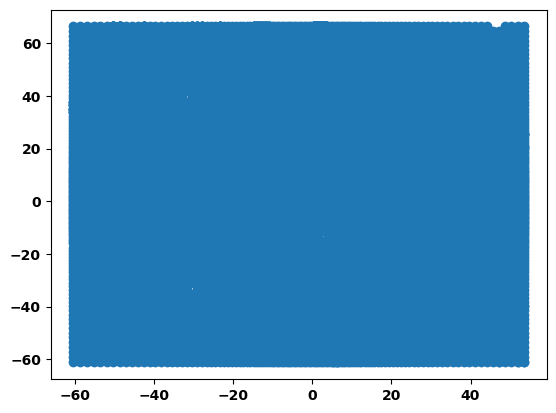

In [27]:
import matplotlib.pyplot as plt

plt.scatter(x=df["x"], y=df["y"], vmin=df["vel"].min(), vmax=df["vel"].max()) #x=df["x"], y=df["y"]

<AxesSubplot: xlabel='x', ylabel='y'>

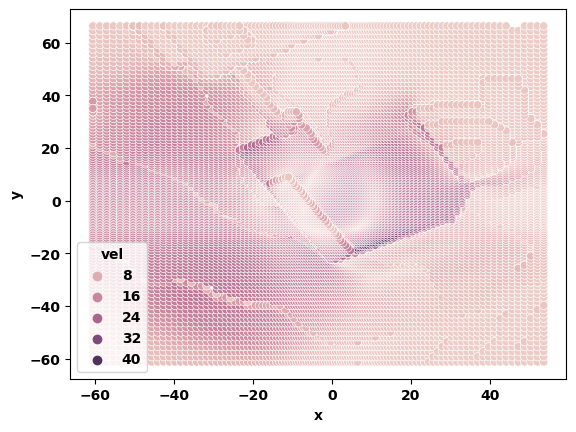

In [31]:
import seaborn as sns

sns.scatterplot(data=df, x=df["x"], y=df["y"], hue=df["vel"], palette="Spectral")